In [1]:
def calculate_global_AR(file, column='amplitudes'):
    '''This function takes CardIAP whole cell analysis output file.
    Returns a list of tuples with transients amplitudes'''
    transients_amplitudes = []
    for i in range(0,len(file)-1):
        transient1 = float(file[column][i])
        transient2 = float(file[column][i+1])
        transients_amplitudes.append((transient1,transient2))
    return transients_amplitudes

def calculate_local_AR(file, column='amplitudes'):
    '''This function takes CardIAP slices analysis output file.
    Returns a list of tuples with transients amplitudes'''
    transients_amplitudes = []
    for i in range(0,len(slice_df)-1):
        transient1 = float(slice_df[column][i])
        transient2 = float(slice_df[column][i+1])
        transients_amplitudes.append((transient1,transient2))
    return transients_amplitudes

In [2]:
def calculate_alternance_ratio(transients):
    '''Alternance Ratio (AR) was calculated as the difference in the magnitude of the two consecutive local transients / the amplitude of the largest transient.
'transients' parameter corresponds to 'calculate_AR' output.
The output is a list of AR'''
    AR_list = []
    for transient_tuple in transients:
        AR = (abs(transient_tuple[0]-transient_tuple[1]))/max(transient_tuple[0], transient_tuple[1])
        AR_list.append(AR)
    return AR_list

In [3]:
def discordance_index(local_AR_df):
    '''The discordance index (DI) is defined as the standard deviation of the measured local AR values.
    Input is 'calculate_alternance_ratio' of local AR output
    Output is a list od DI'''
    return local_AR_df.std().to_list()

In [4]:
# Corre el AR global y devuelve una lista con los valores por pico

import pandas as pd

file_path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/complete_cell.csv'
file = pd.read_csv(file_path,sep='\t',index_col=0)
transients_amplitudes = calculate_global_AR(file)
calculate_alternance_ratio(transients_amplitudes)

[0.06043952354924411,
 0.035714282749258815,
 0.025000039434857808,
 0.03571425226269879,
 0.024390220211343055]

In [5]:
# Corre el AR local y devuelve un df con los valores por slice por pico

import pandas as pd

file_path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/slices (1).csv'
file = pd.read_csv(file_path,sep='\t',index_col=0)
local_AR = []
for slice_ in range(max(file['slice_number'])):
    slice_df = file[file['slice_number']== slice_].reset_index(drop=True)
    transients_amplitudes = calculate_local_AR(file)
    AR = calculate_alternance_ratio(transients_amplitudes)
    local_AR.append(AR)
local_AR_df = pd.DataFrame(local_AR)

In [6]:
# Corre el DI y devuelve una lista con los valores por pico

discordance_index(local_AR_df)

[0.29278613996057745,
 0.27862350201083613,
 0.2734271458332998,
 0.2737429579567253,
 0.2460676558634115,
 0.24800429494730086,
 0.26926470637299155,
 0.26283601753502367,
 0.27891237376061584]

In [7]:
from matplotlib.backends.backend_qt5agg import FigureCanvas

def scaling_image(fig):
    canvas = FigureCanvas(fig)
    canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    width, height = fig.get_size_inches() * fig.get_dpi()
    img = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)
    return img

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def display_multiple_img(images, rows = 4, cols=4):
    fig = plt.figure(figsize=(18, 12))
    plt.subplots_adjust(wspace= 0.01, hspace= 0.01)
    for ind,title in enumerate(images):
        sub = fig.add_subplot(rows,cols,ind+1) # two rows, two columns, fist cell
        sub.imshow(images[ind])
        sub.set_title('Transient'+str(ind+1))
        sub.set_axis_off()
    plt.tight_layout()
    plt.show()

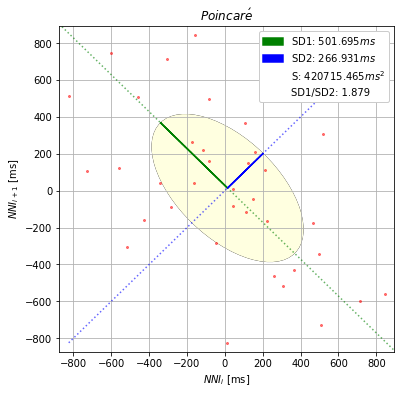

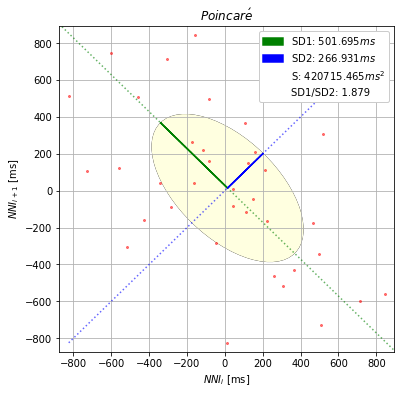

In [22]:
nl.poincare(rpeaks=local_ar_list,show=False)[0]

In [ ]:
import pyhrv.nonlinear as nl

imgs=[]
for i in range(len(local_AR_df.columns)):
    # Estructuración de datos para Poincaré
    local_ar_list = [local_AR_df[i].dropna().tolist()]
    local_ar_list = [item for sublist in local_ar_list for item in sublist]
    # Compute Poincaré using NNI series
    fig = nl.poincare(rpeaks=local_ar_list, show=False)['poincare_plot']
    img = scaling_image(fig)
    imgs.append(img)

display_multiple_img(imgs)

In [ ]:
# Esto grafica la distribución de las amplitudes de las slices de cada pico

import matplotlib.pyplot as plt
import numpy as np

data = np.array(local_AR_df.dropna())
fig7, ax7 = plt.subplots()
ax7.set_title('Transient localAR distributions')
ax7.boxplot(data)

plt.show()

In [ ]:
# Corre el AR local y devuelve un df con los valores por slice por pico

import pandas as pd

file_path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/slices (1).csv'
file = pd.read_csv(file_path,sep='\t',index_col=0)
transients = []
for slice_ in range(max(file['slice_number'])):
    slice_df = file[file['slice_number']== slice_].reset_index(drop=True)
    transients_amplitudes = calculate_local_AR(file)
    transients.append(transients_amplitudes)